# Ensemble model

In [150]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
import os
os.chdir('../src/')
import json
import pandas as pd
from datetime import datetime, timedelta
from copy import deepcopy

from modules.training_module import TrainingModule
from modules.forecasting_module import ForecastingModule
from model_wrappers.model_factory import ModelFactory
from configs.base_config import TrainingModuleConfig
from configs.base_config import ForecastingModuleConfig

from nb_utils import train_eval, forecast
from nb_utils import plot_m1, plot_m2, plot_m3
from nb_utils import set_dates

In [152]:
with open('../notebooks/train_config-homoEnsemble.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

In [153]:
# region = ['bengaluru urban'] 
# region_type = 'district'
# current_day = datetime.now().date() - timedelta(24)
# forecast_length = 30

# train_eval_plot(region, region_type, 
#                 current_day, forecast_length,
#                 ensemble_train_config, ensemble_test_config,
#                 max_evals = 10, 'tracker_district_daily',
#                 mlflow_log = False, mlflow_run_name = None)

## Train-eval-plot step by step

In [154]:
current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

dates

{'train1_start_date': '5/29/20',
 'train1_end_date': '6/4/20',
 'train1_run_day': '5/28/20',
 'train2_start_date': '6/5/20',
 'train2_end_date': '6/12/20',
 'train2_run_day': '6/4/20',
 'test_start_date': '6/5/20',
 'test_end_date': '6/12/20',
 'test_run_day': '6/4/20'}

In [155]:
default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 2
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "testing"

In [156]:
default_train_config

{'data_source': 'tracker_district_daily',
 'region_name': ['bengaluru urban'],
 'region_type': 'district',
 'train_start_date': '5/29/20',
 'train_end_date': '6/4/20',
 'model_class': 'homogeneous_ensemble',
 'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'}},
 'search_space': {'r0': [0.5, 3],
  'EbyCRatio': [0.001, 70],
  'IbyCRatio': [0.001, 2],
  'infectious_period': [1, 10],
  'F_hospitalization': [0, 0.125],
  'F_fatalities': [0.02, 0.12],
  'beta': [0, 2]},
 'search_parameters': {'max_evals': 2},
 'training_loss_function': {'metric_name': 'mape',
  'variable_weights': [{'variable': 'confirmed', 'weight': 0.25},
   {'variable': 'recovered', 'weight': 0.25},
   {'variable': 'deceased', 'weight': 0.25},
   {'variable': 'hospitalized', 'weight': 0.25}]},
 'loss_functions': [{'metric_name': 'mape',
   'variable_weights': [{'variable': 

In [157]:
default_train_config['model_class']

'homogeneous_ensemble'

In [158]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
  

In [159]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)

In [160]:
training_output = TrainingModule.from_config(train_config)

t = 7.90                                             
t = 7.90                                             
100%|██████████| 2/2 [00:00<00:00, 13.32trial/s, best loss: 936.7282866572335]
t = 7.90
t = 7.90


In [161]:
training_output

{'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 61.84182186421985,
    'F_fatalities': 0.03422166983767997,
    'F_hospitalization': 0.09641394363686905,
    'IbyCRatio': 0.8502053404912722,
    'beta': 0.14833401367822696,
    'infectious_period': 2.4272802666367075,
    'r0': 1.095639517863415}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 35.52117026260616,
     'F_fatalities': 0.10790187292539075,
     'F_hospitalization': 0.1059682035827064,
     'IbyCRatio': 1.0580105610265647,
     'beta': 1.4665939731933468,
     'infectious_period': 5.901933762423109,
     'r0': 2.9562826349108344,
     'LatentEbyCRatio': {'5/28/20': 35.52117026260616,
      '6/4/20': 2.537894667555628},
     'LatentIbyCRatio': {'5/28/20': 1

In [162]:
with open('../notebooks/train_config-homoEnsemble.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 10
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "testing"

default_train_config['model_parameters'].update(training_output['model_parameters'])
default_train_config['model_parameters']['modes']['training_mode'] = 'only_beta'
# default_train_config['search_space'] = {'beta': [0,2]}

In [163]:
default_train_config

{'data_source': 'tracker_district_daily',
 'region_name': ['bengaluru urban'],
 'region_type': 'district',
 'train_start_date': '5/29/20',
 'train_end_date': '6/4/20',
 'model_class': 'homogeneous_ensemble',
 'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 61.84182186421985,
    'F_fatalities': 0.03422166983767997,
    'F_hospitalization': 0.09641394363686905,
    'IbyCRatio': 0.8502053404912722,
    'beta': 0.14833401367822696,
    'infectious_period': 2.4272802666367075,
    'r0': 1.095639517863415}},
  'modes': {'training_mode': 'only_beta', 'predict_mode': 'mean'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 35.52117026260616,
     'F_fatalities': 0.10790187292539075,
     'F_hospitalization': 0.1059682035827064,
     'IbyCRatio': 1.0580105610265647,
     'beta': 1.4665939731933468,
     

In [164]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)
training_output = TrainingModule.from_config(train_config)

t = 7.90                                              
t = 7.90                                              
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90  

In [165]:
training_output

{'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 61.84182186421985,
    'F_fatalities': 0.03422166983767997,
    'F_hospitalization': 0.09641394363686905,
    'IbyCRatio': 0.8502053404912722,
    'beta': 0.14833401367822696,
    'infectious_period': 2.4272802666367075,
    'r0': 1.095639517863415}},
  'modes': {'training_mode': 'only_beta', 'predict_mode': 'mean'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 35.52117026260616,
     'F_fatalities': 0.10790187292539075,
     'F_hospitalization': 0.1059682035827064,
     'IbyCRatio': 1.0580105610265647,
     'beta': 1.4665939731933468,
     'infectious_period': 5.901933762423109,
     'r0': 2.9562826349108344,
     'LatentEbyCRatio': {'5/28/20': 35.52117026260616,
      '6/4/20': 2.537894667555628},
     'LatentIbyCRatio': {'5/28/20': 1.05801056

In [188]:
with open('../notebooks/forecast_config-homoEnsemble.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_forecast_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

default_forecast_config['region_name'] = ['bengaluru urban']
default_forecast_config['region_type'] = 'district'
default_forecast_config['forecast_start_date'] = test_start_date
default_forecast_config['forecast_end_date'] = test_end_date
default_forecast_config['run_day'] = test_run_day
default_forecast_config['data_source'] = "tracker_district_daily"
default_forecast_config['output_filepath'] = "testing"
default_forecast_config['model_parameters']['uncertainty_parameters']['include_mean'] = True

In [189]:
forecast_config = ForecastingModuleConfig.parse_obj(default_forecast_config)
forecast_config

ForecastingModuleConfig(data_source='tracker_district_daily', region_name=['bengaluru urban'], region_type='district', model_class=<ModelClass.homogeneous_ensemble: 'homogeneous_ensemble'>, model_parameters={'child_model': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}}, 'modes': {'training_mode': 'constituent_models', 'predict_mode': 'predictions_with_uncertainty'}, 'constituent_models': {'0': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05, 'EbyCRatio': 28.16604550441872, 'F_fatalities': 0.02466701801276612, 'F_hospitalization': 0.06963507606419204, 'IbyCRatio': 1.4785269422997283, 'infectious_period': 5.42824969419175, 'r0': 2.0045875407735303, 'LatentEbyCRatio': {'5/27/20': 28.16604550441872, '6/3/20': 1.6812382970858852}, 'LatentIbyCRatio': {'5/27/20': 1.4785269422997283, '6/3/20': 0.26879511010742685}}}, '1': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05, 'EbyCRatio'

In [190]:
forecasting_output = ForecastingModule.from_config(forecast_config)

KeyError: 'window'

In [175]:
forecasting_output

,Region Type,Region,Country,Lat,Long,prediction_type,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20
0,district,bengaluru urban,India,20,70,exposed,630.165699,607.917446,614.961169,642.018432,683.363436,736.492414,799.098336,870.551024
1,district,bengaluru urban,India,20,70,icu,4.564251,3.962583,4.137698,4.617762,5.212335,5.859424,6.533106,7.239914
2,district,bengaluru urban,India,20,70,recovered,344.286713,401.321911,455.684531,514.634882,580.910784,655.629449,739.309452,832.329161
3,district,bengaluru urban,India,20,70,deceased,8.707310,10.149780,11.524657,13.015563,14.691738,16.581438,18.697778,21.050327
4,district,bengaluru urban,India,20,70,confirmed,444.279051,490.723352,549.963147,620.005682,699.849217,789.399372,888.669356,998.177764
5,district,bengaluru urban,India,20,70,hospitalized,91.285028,79.251661,82.753959,92.355237,104.246695,117.188485,130.662126,144.798276
6,district,bengaluru urban,India,20,70,active,91.285028,79.251661,82.753959,92.355237,104.246695,117.188485,130.662126,144.798276
7,district,bengaluru urban,India,20,70,infected,212.444573,289.313908,351.938326,407.251963,459.801777,511.979686,566.107297,623.423530
8,district,bengaluru urban,India,20,70,final,352.994023,411.471690,467.209188,527.650446,595.602522,672.210887,758.007230,853.379488


In [19]:
ensemble_train_config['model_parameters'].update(training_output['model_parameters']['constituent_models'])

In [20]:
ensemble_train_config['model_parameters'].update(training_output['model_parameters']['constituent_model_losses'])

In [21]:
ensemble_train_config['model_parameters']['with_uncertainty'] = False

In [22]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
  

In [23]:
params, metrics, train1_model_params, train2_model_params = train_eval(['bengaluru urban'], 'district', 
                                                                       train1_start_date, train1_end_date, 
                                                                       train2_start_date, train2_end_date, train2_run_day,
                                                                       test_start_date, test_end_date,
                                                                       ensemble_train_config, ensemble_test_config,
                                                                       max_evals=10, data_source='tracker_district_daily',
                                                                       mlflow_log=False, name_prefix="testing")

t = 7.90                                              
t = 7.90                                              
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90  

In [24]:
params

{'region': 'bengaluru urban',
 'region_type': 'district',
 'train1_start_date': '5/28/20',
 'train1_end_date': '6/3/20',
 'train2_start_date': '6/4/20',
 'train2_end_date': '6/11/20',
 'run_day': '6/3/20',
 'test_start_date': '6/4/20',
 'test_end_date': '6/11/20',
 'data_source': 'tracker_district_daily'}

In [25]:
metrics

{'Train1RMLSE': 0,
 'Train1MAPE': 158.81939766749124,
 'Train1_mape_confirmed': 3.904673831144664,
 'Train1_mape_confirmed_weight': 1.0,
 'Train1_mape_hospitalized': 81.05224112045933,
 'Train1_mape_hospitalized_weight': 1.0,
 'Train1_mape_recovered': 65.37265616538137,
 'Train1_mape_recovered_weight': 1.0,
 'Train1_mape_deceased': 8.489826550505883,
 'Train1_mape_deceased_weight': 1.0,
 'TestMAPE': 199.90914369178677,
 'TestRMLSE': 0,
 'Test_mape_confirmed': 7.6427256006091335,
 'Test_mape_confirmed_weight': 1.0,
 'Test_mape_hospitalized': 80.05231444327657,
 'Test_mape_hospitalized_weight': 1.0,
 'Test_mape_recovered': 63.503913525905,
 'Test_mape_recovered_weight': 1.0,
 'Test_mape_deceased': 8.728361383638706,
 'Test_mape_deceased_weight': 1.0,
 'Train2MAPE': 159.9273149534294,
 'Train2RMLSE': 0,
 'Train2_mape_confirmed': 7.642725600609132,
 'Train2_mape_confirmed_weight': 1.0,
 'Train2_mape_hospitalized': 80.05231444327657,
 'Train2_mape_hospitalized_weight': 1.0,
 'Train2_mape_re

In [26]:
train1_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious

In [27]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious

In [104]:
import pandas as pd
model_parameters = train2_model_params['model_parameters']
model_parameters['constituent_models']['0']['model_parameters']['r0'] = 3.4
param_of_interest = 'r0'
params_dict = dict()
weights = {'0':0.5, '1':0.5} 
for idx in model_parameters['constituent_model_losses']:
    params_dict[idx] = [weights[idx], 
                        model_parameters['constituent_models'][idx]['model_parameters'][param_of_interest],
                       ]
    
params_df = pd.DataFrame.from_dict(params_dict, orient = 'index', columns = ['weight', 'ParamOfInterest'])


In [105]:
params_df

,weight,ParamOfInterest
0,0.5,3.400000
1,0.5,2.058303


In [106]:
from utils.distribution_util import weights_to_pdf, pdf_to_cdf, get_best_index

params_df['pdf'] = weights_to_pdf(params_df['weight'])
params_df = params_df.sort_values(by='ParamOfInterest').reset_index()
params_df['cdf'] = pdf_to_cdf(params_df['pdf'])

In [107]:
params_df

,index,weight,ParamOfInterest,pdf,cdf
0,1,0.5,2.058303,0.5,0.5
1,0,0.5,3.400000,0.5,1.0


In [117]:

percentiles_dict = dict()
def get_best_index(df, percentile):
    df['diff'] = (df['cdf'] - percentile / 100).apply(abs)
    idx = (df['diff']).idxmin()
    df.drop(['diff'], axis = 1, inplace = True)
    return df.iloc[idx]['index']

for p in [45, 95]:
    percentiles_dict[p] = get_best_index(params_df, p)
    

In [120]:
percentiles_dict.pop(4)

KeyError: 4

In [128]:
tempDict = {"level1": {"level2": 2}, "level12": 23}

In [129]:
tempDict

{'level1': {'level2': 2}, 'level12': 23}

In [131]:
tempDict.update({"level11":2223})
tempDict

{'level1': {'level2': 2}, 'level12': 2223, 'level11': 2223}

In [113]:
params_df

,index,weight,ParamOfInterest,pdf,cdf
0,1,0.5,2.058303,0.5,0.5
1,0,0.5,3.400000,0.5,1.0


In [28]:
forecast_start_date = '6/2/20'
forecast_length = 30
forecast_run_day = (datetime.strptime(forecast_start_date, "%m/%d/%y") - timedelta(days=1)).strftime("%-m/%-d/%y")
forecast_end_date = (datetime.strptime(forecast_start_date, "%m/%d/%y") + timedelta(days=forecast_length)).strftime("%-m/%-d/%y")

In [29]:
forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90


prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final,...,hospitalized_min,hospitalized_max,icu_min,icu_max,recovered_min,recovered_max,deceased_min,deceased_max,confirmed_min,confirmed_max
0,6/2/20,115.457581,3.176167,312.338348,9.460369,385.322064,63.523348,63.523348,32.799366,321.798717,...,38.125552,88.921144,1.906278,4.446057,187.459765,437.216931,5.677940,13.242797,231.263256,539.380872
1,6/3/20,106.531002,1.995823,358.272236,10.851653,409.040347,39.916458,39.916458,31.249568,369.123889,...,23.957128,55.875788,1.197856,2.793789,215.028444,501.516028,6.512964,15.190343,245.498536,572.582159
2,6/4/20,98.520082,1.502486,389.548864,11.798986,431.397578,30.049727,30.049727,29.385277,401.347850,...,18.035297,42.064158,0.901765,2.103208,233.800104,545.297624,7.081536,16.516437,258.916937,603.878218
3,6/5/20,91.250566,1.268116,414.429880,12.552604,452.344809,25.362326,25.362326,27.402368,426.982483,...,15.222004,35.502648,0.761100,1.775132,248.733235,580.126524,7.533843,17.571364,271.489082,633.200536
4,6/6/20,84.554684,1.130425,436.013379,13.206343,471.828223,22.608501,22.608501,25.492387,449.219722,...,13.569209,31.647793,0.678460,1.582390,261.687256,610.339501,7.926206,18.486480,283.182671,660.473775
5,6/7/20,78.388851,1.032847,455.498304,13.796519,489.951766,20.656943,20.656943,23.653005,469.294823,...,12.397919,28.915966,0.619896,1.445798,273.381752,637.614856,8.280418,19.312619,294.060090,685.843442
6,6/8/20,72.670871,0.951681,473.382768,14.338219,506.754598,19.033611,19.033611,21.949126,487.720986,...,11.423625,26.643597,0.571181,1.332180,284.115680,662.649855,8.605537,20.070901,304.144842,709.364353
7,6/9/20,67.373116,0.880416,489.893014,14.838295,522.339624,17.608315,17.608315,20.362923,504.731309,...,10.568188,24.648441,0.528409,1.232422,294.024828,685.761200,8.905673,20.770917,313.498690,731.180558
8,6/10/20,62.473627,0.816119,505.183434,15.301424,536.807238,16.322381,16.322381,18.872014,520.484858,...,9.796394,22.848367,0.489820,1.142418,303.201858,707.165009,9.183635,21.419213,322.181888,751.432589
9,6/11/20,57.923144,0.756183,519.356808,15.730719,550.211181,15.123654,15.123654,17.501922,535.087527,...,9.076940,21.170367,0.453847,1.058518,311.708459,727.005158,9.441290,22.020149,330.226689,770.195673


t = 7.90
t = 7.90
t = 8.90
t = 8.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


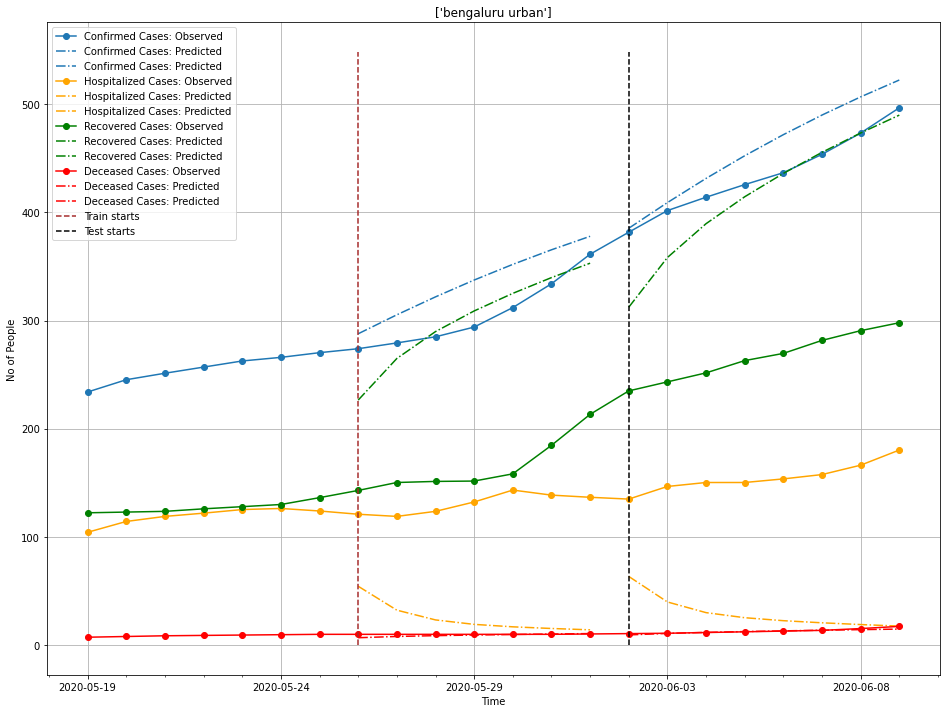

In [23]:
plot_m1(train1_model_params, train1_run_day, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm1.png')

t = 8.90
t = 8.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/core/frame.py:6690: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(to_concat, ignore_index=ignore_index,


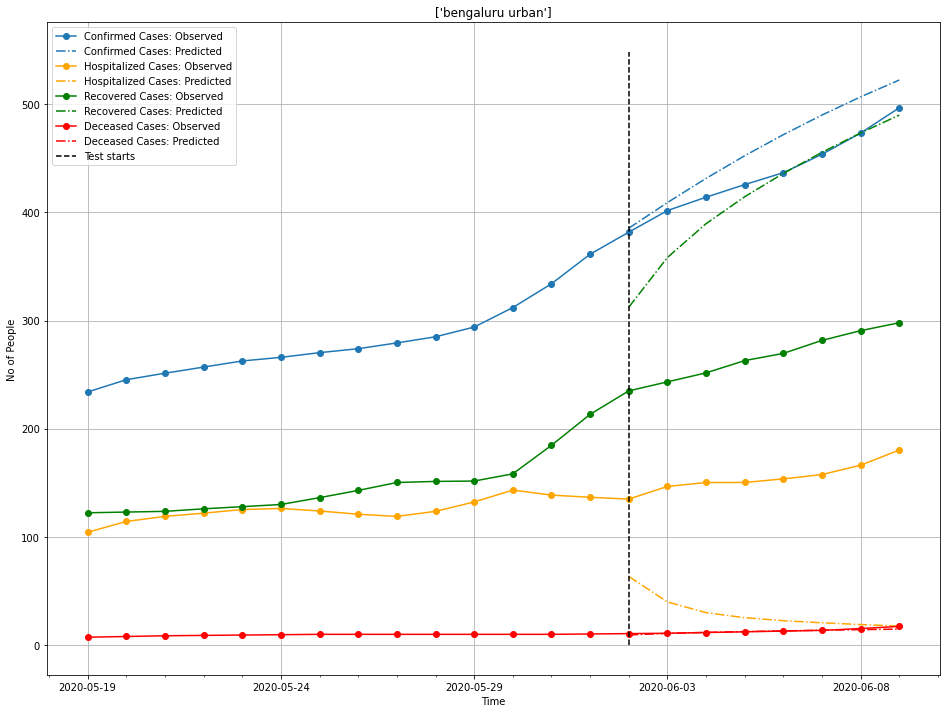

In [24]:
plot_m2(train2_model_params, train1_start_date, train1_end_date,
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm2.png')

t = 31.90
t = 31.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/core/frame.py:6690: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(to_concat, ignore_index=ignore_index,


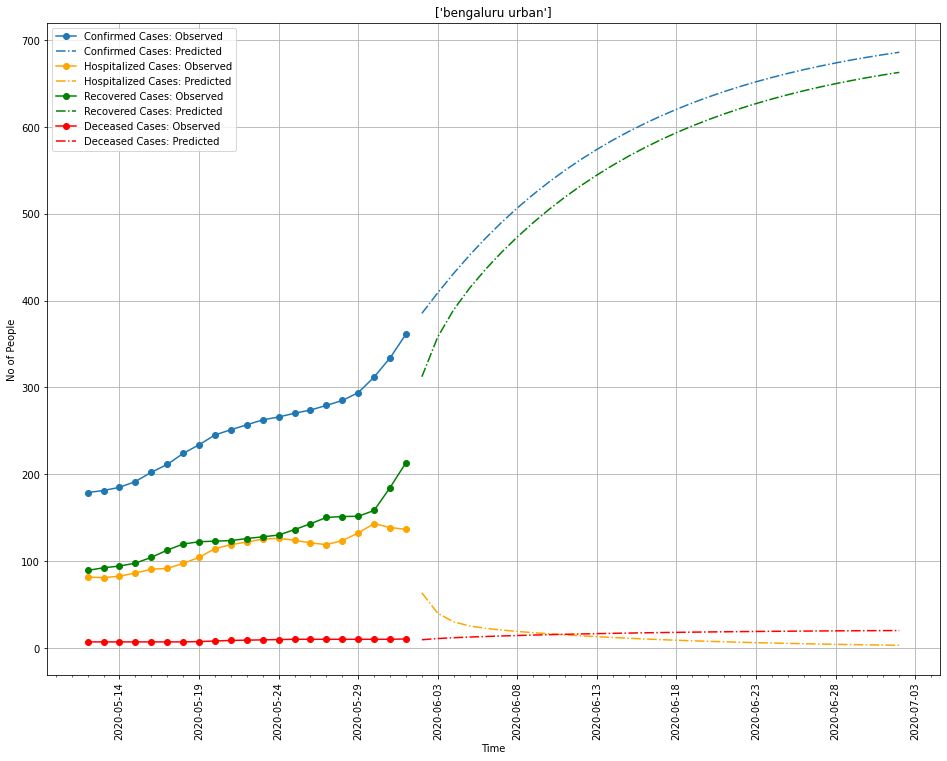

In [25]:
plot_m3(train2_model_params, train1_start_date, 
        forecast_start_date, forecast_length, 
        rolling_average = False, uncertainty = False,
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm3.png')

In [26]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious

In [27]:
train2_model_params['model_parameters']['with_uncertainty'] = True

In [28]:
train2_model_params['model_parameters']['uncertainty_parameters'] = {
            "include_mean": "True",
            "percentiles": [10, 20, 30, 40, 50, 60, 70, 80, 90],
            "ci": 95,
            "date_of_interest": "6/3/20",
            "column_of_interest": "hospitalized",
            "window": 5
        }

In [29]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious

In [30]:
uncertainty_df = forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/core/frame.py:6690: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(to_concat, ignore_index=ignore_index,


In [31]:
pd.set_option("display.max_columns", None)
uncertainty_df

prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final,predictionDate,Region Type,Region,Country,Lat,Long,active_10,hospitalized_10,icu_10,recovered_10,deceased_10,total_10,active_20,hospitalized_20,icu_20,recovered_20,deceased_20,total_20,active_30,hospitalized_30,icu_30,recovered_30,deceased_30,total_30,active_40,hospitalized_40,icu_40,recovered_40,deceased_40,total_40,active_50,hospitalized_50,icu_50,recovered_50,deceased_50,total_50,active_60,hospitalized_60,icu_60,recovered_60,deceased_60,total_60,active_70,hospitalized_70,icu_70,recovered_70,deceased_70,total_70,active_80,hospitalized_80,icu_80,recovered_80,deceased_80,total_80,active_90,hospitalized_90,icu_90,recovered_90,deceased_90,total_90,active_low,hospitalized_low,icu_low,recovered_low,deceased_low,total_low,active_high,hospitalized_high,icu_high,recovered_high,deceased_high,total_high,active_min,active_max,hospitalized_min,hospitalized_max,icu_min,icu_max,recovered_min,recovered_max,deceased_min,deceased_max,confirmed_min,confirmed_max
0,6/10/20,62.4739,0.816128,505.184,15.3014,536.808,16.3226,16.3226,18.8715,520.485,6/10/20,NaN,NaN,NaN,NaN,NaN,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,16.3226,16.3226,0.326451,505.184,15.3014,536.808,10.3875,22.2576,10.3875,22.2576,0.519376,1.11288,321.494,688.873,9.73769,20.8652,341.619,731.996
1,6/11/20,57.9227,0.756152,519.357,15.7307,550.211,15.123,15.123,17.5027,535.087,6/11/20,NaN,NaN,NaN,NaN,NaN,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,15.123,15.123,0.302461,519.357,15.7307,550.211,9.62416,20.6219,9.62416,20.6219,0.481208,1.0311,330.514,708.2,10.0109,21.4506,350.149,750.272
2,6/12/20,53.6964,0.700699,532.487,16.1284,562.629,14.014,14.014,16.2436,548.615,6/12/20,NaN,NaN,NaN,NaN,NaN,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,14.014,14.014,0.28028,532.487,16.1284,562.629,8.91837,19.1096,8.91837,19.1096,0.445918,0.95548,338.87,726.104,10.264,21.9929,358.052,767.206
3,6/13/20,49.79,0.650118,544.661,16.4971,574.16,13.0024,13.0024,15.0567,561.158,6/13/20,NaN,NaN,NaN,NaN,NaN,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,13.0024,13.0024,0.260047,544.661,16.4971,574.16,8.27458,17.7301,8.27458,17.7301,0.413729,0.886507,346.617,742.704,10.4986,22.4957,365.39,782.93
4,6